# Abhishek Kalekar 
Data Science Intern
Oasis Infobyte Internship Jan 2026 

Iris Flower Classification


Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.


# Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


# Importing Dataset

In [6]:
iris = load_iris()

In [7]:
X = iris.data     # features
y = iris.target   # labels


In [8]:
# Convert to a DataFrame for easier viewing
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()         # show first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Describe data

In [9]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Plot visualizations

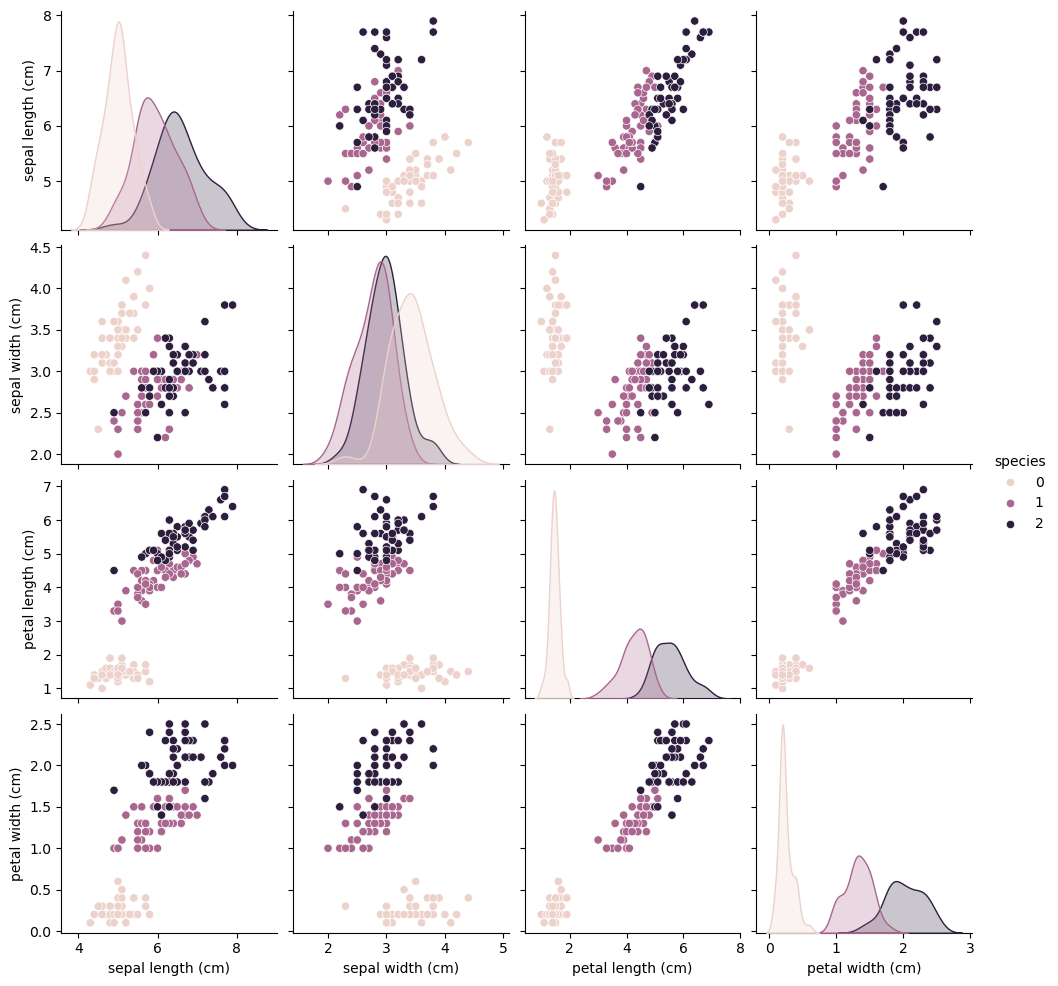

In [10]:
sns.pairplot(df, hue='species')
plt.show()


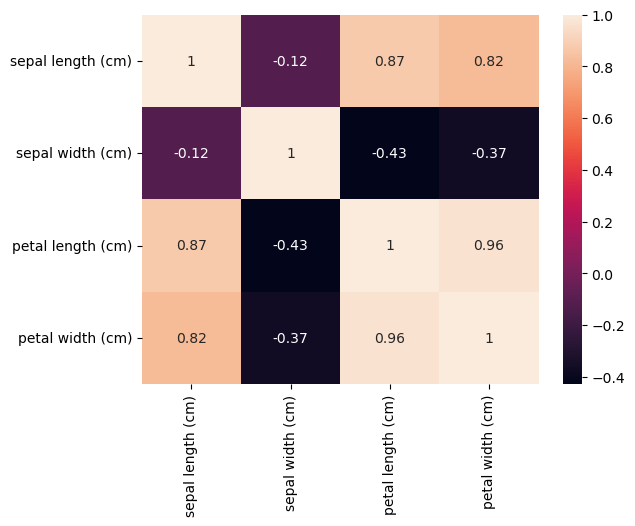

In [11]:
sns.heatmap(df.iloc[:, :-1].corr(), annot=True)
plt.show()


# Train–Test split

In [12]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train model

In [14]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Predict & evaluate

In [15]:
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Train Model Using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

# Evaluate KNN Model

In [17]:
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 1.0


# Train Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

# Train Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

# Compare Model Accuracies

In [20]:
models = {
    "Logistic Regression": model,
    "KNN": knn,
    "Decision Tree": dt,
    "SVM": svm
}

for name, mdl in models.items():
    pred = mdl.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, pred))


Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVM Accuracy: 0.9666666666666667


# Predict on New Iris Flower Data

In [21]:
# Example flower measurements
new_flower = [[5.1, 3.5, 1.4, 0.2]]

prediction = model.predict(scaler.transform(new_flower))
prediction


array([0])

# Convert Prediction to Species Name

In [22]:
species_map = {
    0: "Setosa",
    1: "Versicolor",
    2: "Virginica"
}

species_map[prediction[0]]


'Setosa'

# Save Model

In [23]:
import joblib

joblib.dump(model, "iris_model.pkl")


['iris_model.pkl']

# Load Saved Model

In [24]:
loaded_model = joblib.load("iris_model.pkl")


# Plot Confusion Matrix

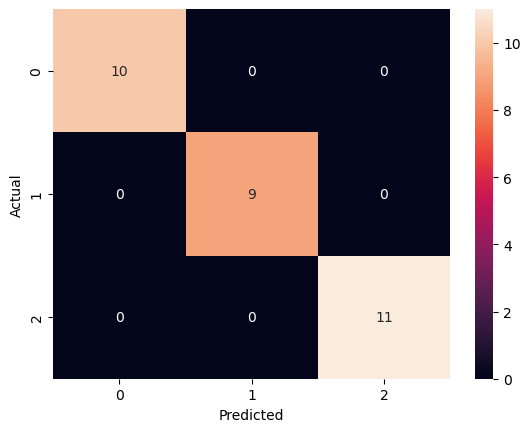

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Histogram

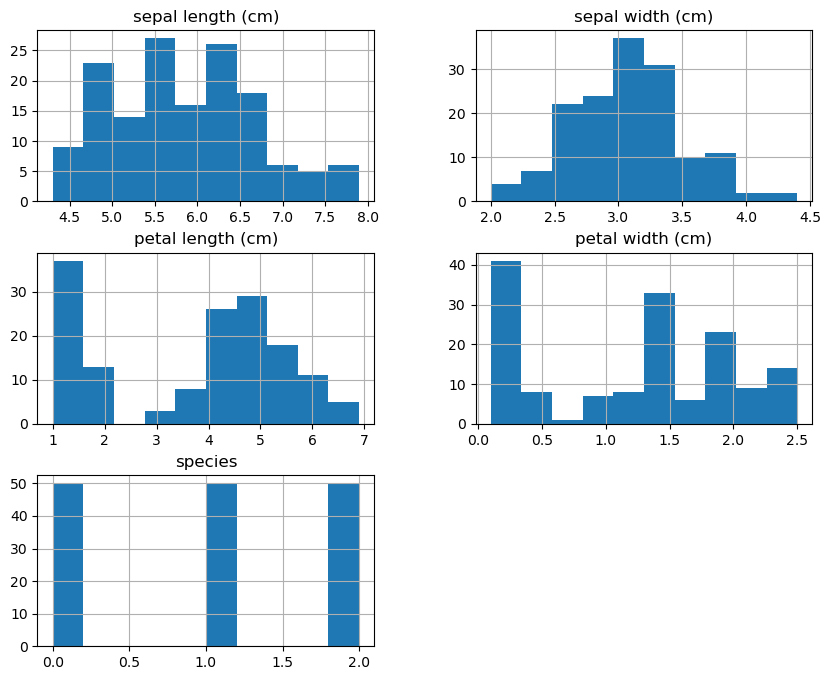

In [27]:
df.hist(figsize=(10, 8))
plt.show()


# Box Plot

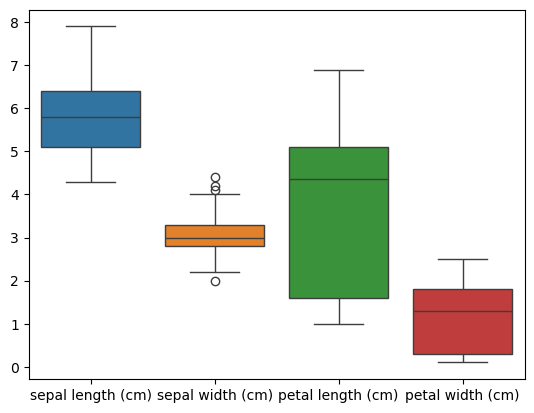

In [28]:
sns.boxplot(data=df.iloc[:, 0:4])
plt.show()


# Show Final Confusion Matrix

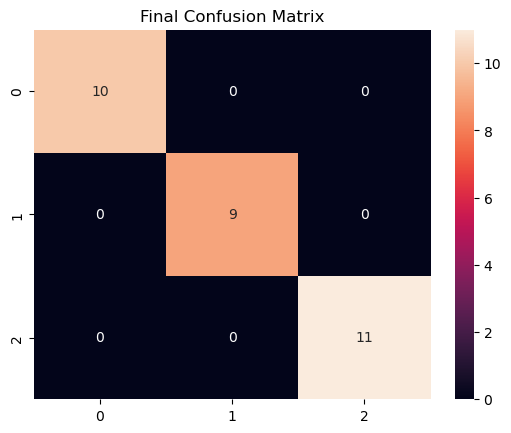

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Final Confusion Matrix")
plt.show()


# Thank You